### Import Libraries

In [43]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Load Dataset

In [32]:
# Load the CSV file
csv_file_path = '/content/text.csv'  
data = pd.read_csv(csv_file_path)
data = data.iloc[:300,:]  # use 300 samples only from dataset
data

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
295,295,i feel a bit ashamed about it,0
296,296,i just feel like i want to change it again a h...,1
297,297,i can feel glamorous without makeup too especi...,1
298,298,i feel like i deserve to feel this way like i ...,0


In [33]:
data.pop('Unnamed: 0') # Remove this column from dataset
data

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
295,i feel a bit ashamed about it,0
296,i just feel like i want to change it again a h...,1
297,i can feel glamorous without makeup too especi...,1
298,i feel like i deserve to feel this way like i ...,0


In [34]:
# Define the mapping from integer labels to emotion names
label_to_emotion = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

# Map integer labels to emotion names using replace function
data['emotion'] = data['label'].replace(label_to_emotion)

In [35]:
data

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear
...,...,...,...
295,i feel a bit ashamed about it,0,sadness
296,i just feel like i want to change it again a h...,1,joy
297,i can feel glamorous without makeup too especi...,1,joy
298,i feel like i deserve to feel this way like i ...,0,sadness


### Visualization

<ipython-input-40-25fa8d79149a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


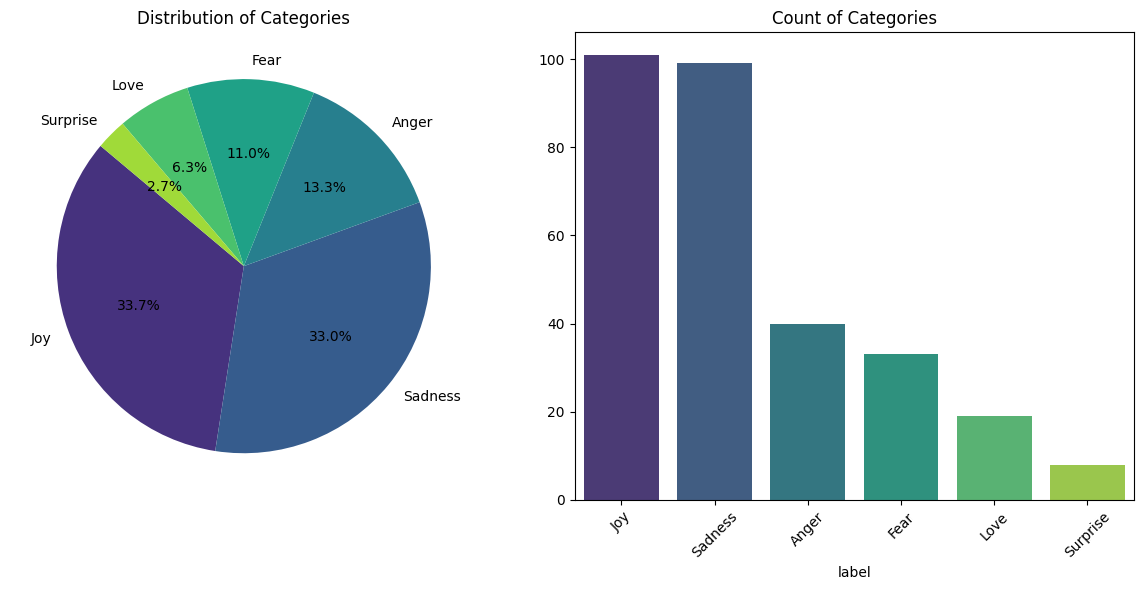

In [40]:
# Value Count Of Label
count = data['label'].value_counts()

# Map numeric labels to class names
label_names = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

count.index = count.index.map(label_names)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Rotate x-labels for better readability
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


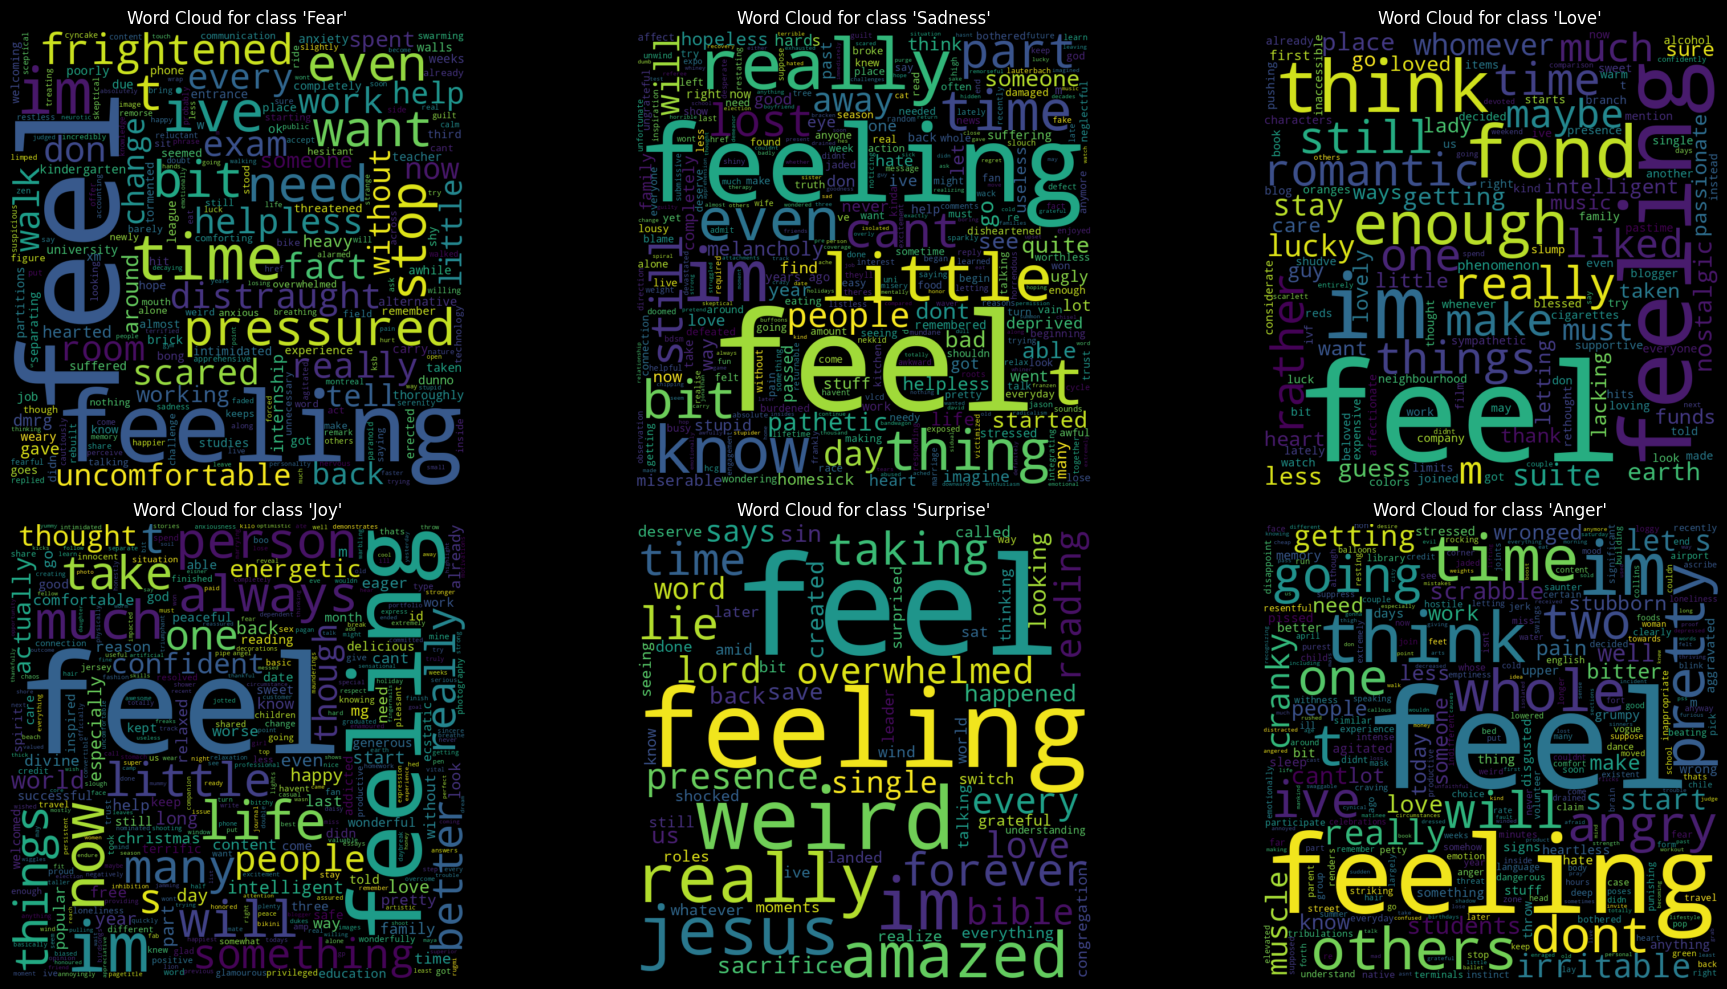

In [44]:
# Function to generate word cloud for a specific class
def generate_wordcloud(text, ax, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='black',
                          stopwords=None,
                          max_words=400,
                          min_font_size=10).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, color='white')
    ax.axis("off")

# Generate word cloud for each class in subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='black')


for i, label in enumerate(data['label'].unique()):
    text = ' '.join(data[data['label'] == label]['text'])
    row = i // 3
    col = i % 3
    generate_wordcloud(text, axs[row, col], f"Word Cloud for class '{label_names[label]}'")

plt.tight_layout()
plt.show()

### Load Pretrain Model

In [14]:
# Initialize zero-shot classification pipeline
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [45]:
# Define possible class names (emotions)
class_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

# Function to get zero-shot classification predictions
def get_predictions(texts, class_names):
    predictions = []
    for text in texts:
        result = classifier(text, class_names)
        predicted_class = result['labels'][0]
        predictions.append(predicted_class)
    return predictions

In [46]:
# Get texts and true emotion labels from the data
texts = data.iloc[:, 0].tolist()
true_emotions = data['emotion'].tolist()

In [47]:
# Get zero-shot predictions
predicted_emotions = get_predictions(texts, class_names)

# Map emotions back to integer labels for evaluation
emotion_to_label = {v: k for k, v in label_to_emotion.items()}
true_labels = [emotion_to_label[emotion] for emotion in true_emotions]
predicted_labels = [emotion_to_label[emotion] for emotion in predicted_emotions]

In [48]:
# Print true and predicted emotions for the first 30 rows
print("True vs Predicted Emotions for the first 30 rows:")
for i in range(30):
    print(f"Text: {texts[i]}")
    print(f"True Emotion: {true_emotions[i]}, Predicted Emotion: {predicted_emotions[i]}")
    print()

True vs Predicted Emotions for the first 30 rows:
Text: i just feel really helpless and heavy hearted
True Emotion: fear, Predicted Emotion: sadness

Text: ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
True Emotion: sadness, Predicted Emotion: surprise

Text: i gave up my internship with the dmrg and am feeling distraught
True Emotion: fear, Predicted Emotion: sadness

Text: i dont know i feel so lost
True Emotion: sadness, Predicted Emotion: surprise

Text: i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative
True Emotion: fear, Predicted Emotion: fear

Text: i was beginning to feel quite disheartened
True Emotion: sadness, Predicte

In [49]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

# Generate and print classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print('Classification Report:')
print(report)

Accuracy: 0.39666666666666667
Classification Report:
              precision    recall  f1-score   support

     sadness       0.77      0.41      0.54        99
         joy       0.89      0.31      0.46       101
        love       0.47      0.42      0.44        19
       anger       0.80      0.40      0.53        40
        fear       0.50      0.45      0.48        33
    surprise       0.06      1.00      0.10         8

    accuracy                           0.40       300
   macro avg       0.58      0.50      0.43       300
weighted avg       0.75      0.40      0.49       300



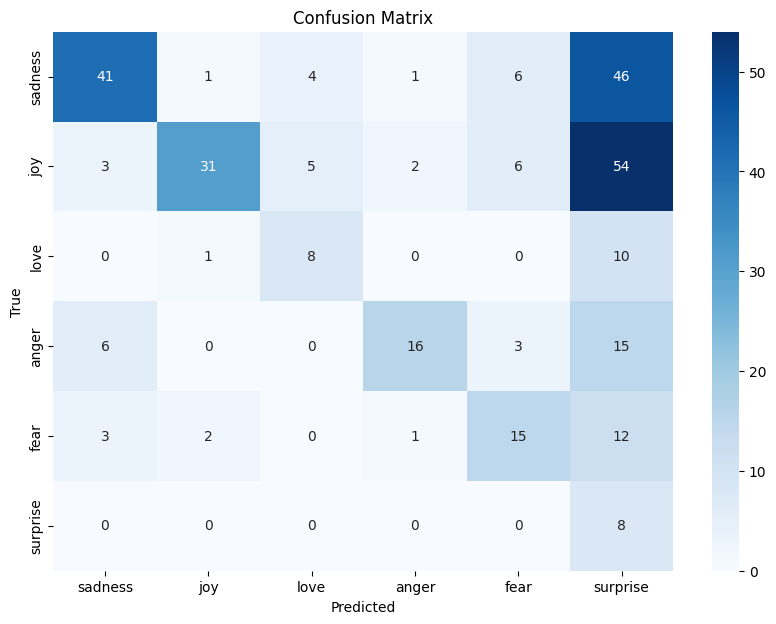

In [50]:
# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()